**Importing Necessory Libraries**

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [41]:
df=pd.read_csv('/content/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# EDA (Explotry Data Analysis)

In [42]:
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [43]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [44]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [45]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

# Visulization

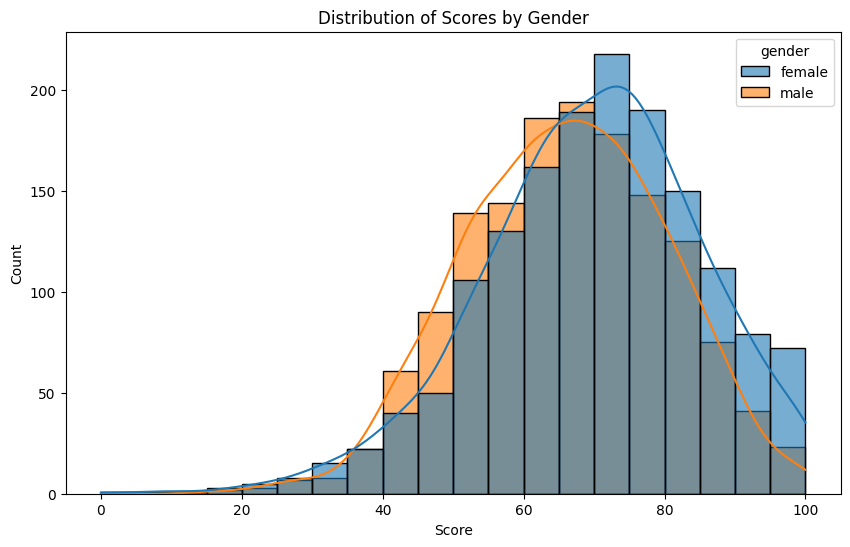

In [46]:
df_melted = df.melt(id_vars=['gender'],
                    value_vars=['math score', 'reading score', 'writing score'],
                    var_name='score_type',
                    value_name='score')

# Plot histograms with hue for gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df_melted, x='score', hue='gender', bins=20, kde=True, alpha=0.6)
plt.title('Distribution of Scores by Gender')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

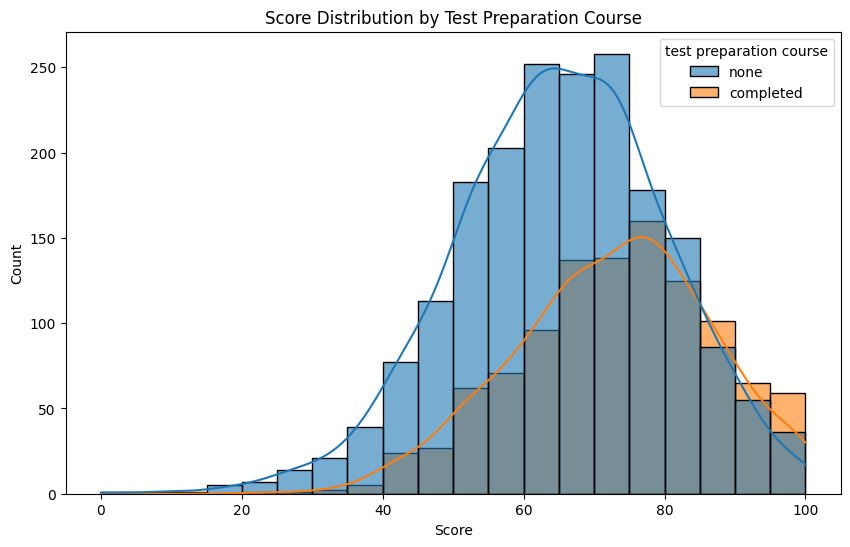

In [47]:
df_melted = df.melt(id_vars=['test preparation course'],
                    value_vars=['math score', 'reading score', 'writing score'],
                    var_name='score_type',
                    value_name='score')

# Plot histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=df_melted, x='score', hue='test preparation course', bins=20, kde=True, alpha=0.6)
plt.title('Score Distribution by Test Preparation Course')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

# Feature Engineering

In [61]:
df['Avg_Score']=df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['Avg_Score']

,Avg_Score
0,72.666667
1,82.333333
2,92.666667
3,49.333333
4,76.333333
...,...
995,94.000000
996,57.333333
997,65.000000
998,74.333333


In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['test preparation course']=le.fit_transform(df['test preparation course'])

In [49]:
df['parental level of education']=le.fit_transform(df['parental level of education'])

In [63]:
df['gender']=le.fit_transform(df['gender'])

In [64]:
df[['parental level of education', 'test preparation course','gender']]

,parental level of education,test preparation course,gender
0,1,1,0
1,4,0,0
2,3,1,0
3,0,1,1
4,4,1,1
...,...,...,...
995,3,0,0
996,2,1,1
997,2,0,0
998,4,0,0


# Model Training

**Logistic Regression For Gender Prediction**

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X=df[['math score','reading score','writing score','parental level of education','test preparation course']]
y=df['gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr=LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred)*100,'%')
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 91.5 %
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        97
           1       0.93      0.90      0.92       103

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200

Confusion Matrix:
 [[90  7]
 [10 93]]


**Logistic Regression For test preparation course**

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X=df[['math score','reading score','writing score','parental level of education','gender']]
y=df['test preparation course']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.62      0.71      0.66        79
           1       0.79      0.71      0.75       121

    accuracy                           0.71       200
   macro avg       0.70      0.71      0.70       200
weighted avg       0.72      0.71      0.71       200

Confusion Matrix:
 [[56 23]
 [35 86]]


**Random Forest Classifier For test preparation course**

In [109]:
from sklearn.ensemble import RandomForestClassifier
X=df[['math score','reading score','writing score','parental level of education','gender']]
y=df['test preparation course']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(class_weight='balanced',n_estimators=300,max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred)*100,'%')
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 67.0 %
              precision    recall  f1-score   support

           0       0.59      0.56      0.57        79
           1       0.72      0.74      0.73       121

    accuracy                           0.67       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.67      0.67      0.67       200

Confusion Matrix:
 [[44 35]
 [31 90]]
